Assignment 2: Clustering

Objective:
The primary objective of this assignment is to understand and implement different clustering techniques for customer segmentation. You are required to interpret the significance of the clusters formed and provide actionable insights.

Data Preprocessing [5 marks]:

Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.

If applicable, use dimensionality reduction and discuss how it impacts the clusters.

Explain your data preparation process.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/rbaid-9/Data-Science-2/main/Customer_Data.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Since there is only 313 values missing for Minimum payments and 1 value missing for credit limit, I am going to drop these rows.

In [7]:
df.dropna(inplace=True)

In [8]:
# drop the CUST_ID column as it is not relevant for clustering
df.drop('CUST_ID', axis=1, inplace=True)

In [9]:
df1=df.copy()

Since there are no categorical values, I am not encoding any features.

In [10]:
# perform feature scaling using StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df1)

In [11]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_pca = pca.fit_transform(scaled_df)

In [12]:
data_pca

array([[-1.69639556, -1.12258244],
       [-1.21569038,  2.43567347],
       [ 0.93586365, -0.38523869],
       ...,
       [-0.93002467, -1.84124142],
       [-2.35601175, -0.71872331],
       [-0.5968151 , -0.44603166]])

I did PCA, but I am not going to use this for clustering. Clustering is typically performed on scaled data rather than PCA-transformed data because fo the following reasons:

Interpretability: Clustering on scaled data allows to interpret the results more easily because the clusters are formed in the original feature space. Each cluster corresponds to a group of data points with similar feature values. This makes it more straightforward to understand what each cluster represents.

Loss of Information: PCA reduces the dimensionality of the data by creating new features (principal components) that are linear combinations of the original features. While PCA can help reduce noise and redundancy in the data, it also leads to a loss of interpretability. Clustering on PCA-transformed data might make it challenging to relate the clusters back to the original features.

Normalization and Scaling: Clustering algorithms often rely on distance-based metrics to measure the similarity between data points. If the features have different scales or units, they can disproportionately influence the clustering process. Scaling standardizes the features, ensuring that each feature contributes equally to the clustering.

Data Transformation vs. Clustering: PCA is primarily used for dimensionality reduction and data compression. It is a preprocessing step that reduces the number of features while retaining most of the variance in the data. Clustering, on the other hand, is a separate analysis aimed at grouping similar data points based on their feature values.

2. Exploratory Data Analysis (EDA) [5 marks]:

Perform an EDA to understand the data and identify patterns that could inform the clustering.
Explain your findings.

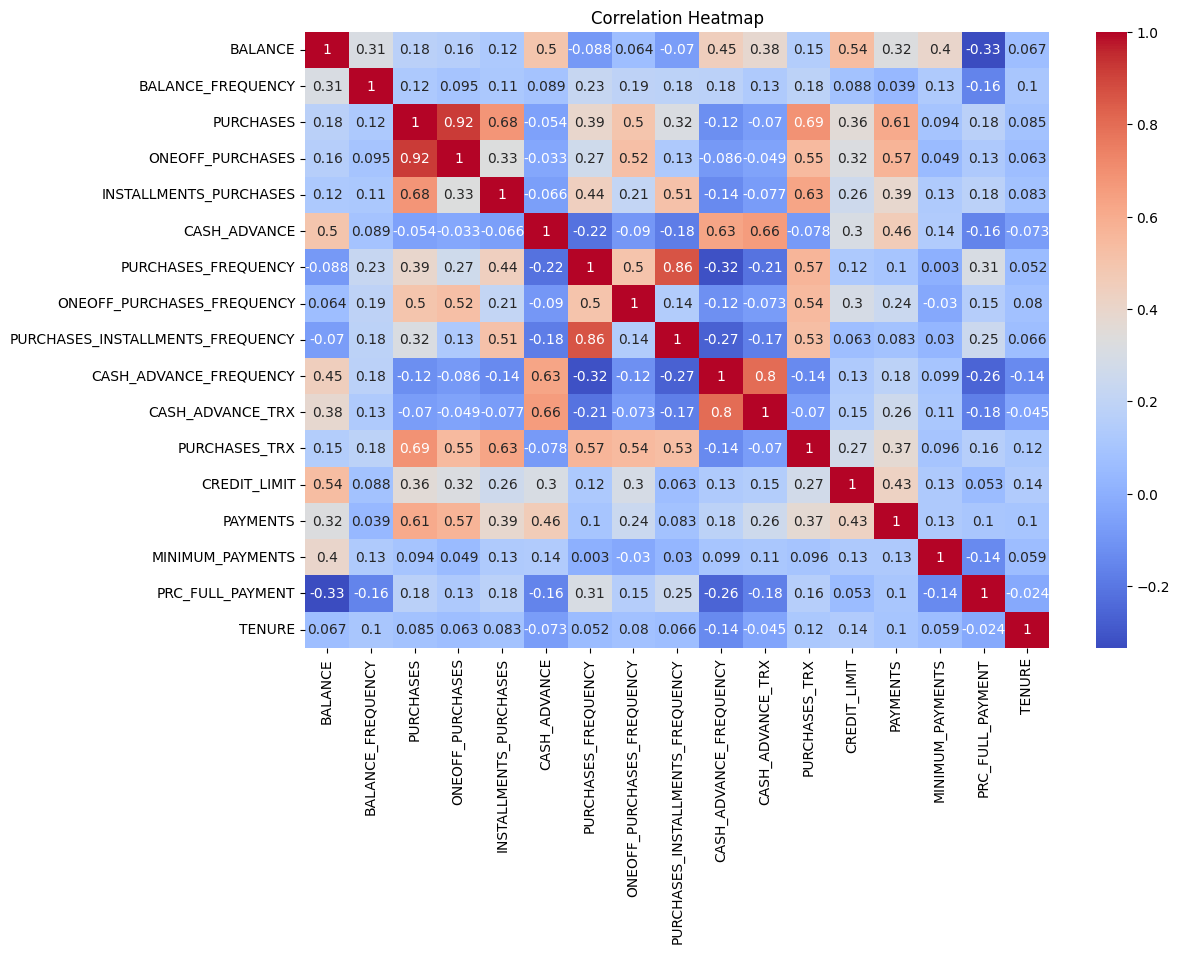

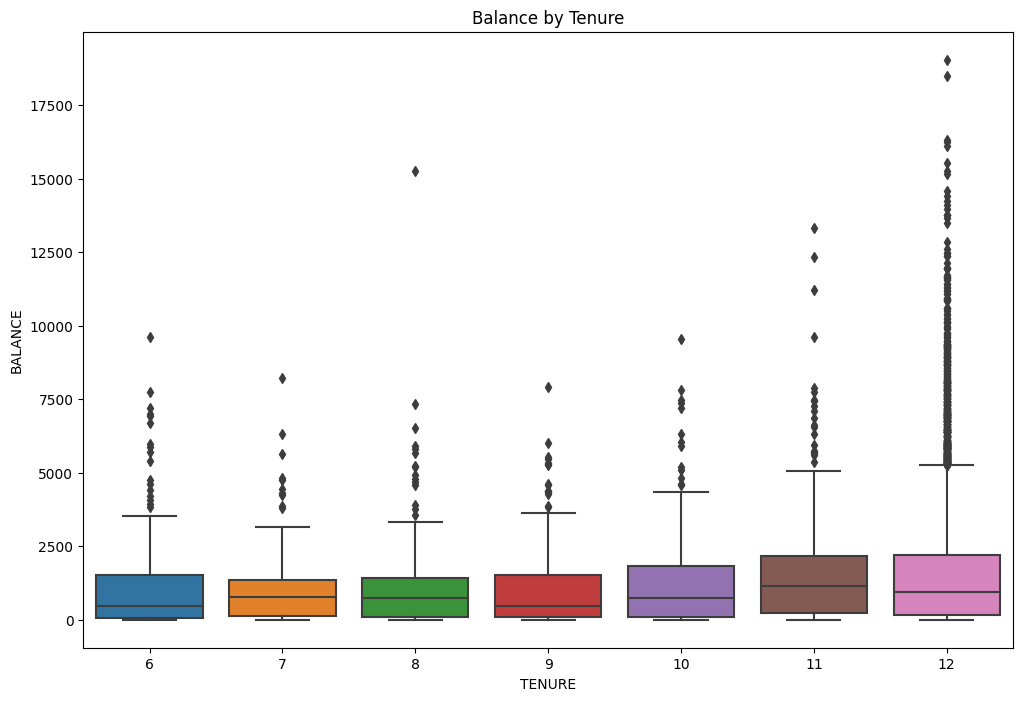

In [14]:
import matplotlib.pyplot as plt

# Pairwise correlations between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# Box plot for different features

plt.figure(figsize=(12, 8))
sns.boxplot(x='TENURE', y='BALANCE', data=df)
plt.title("Balance by Tenure")
plt.show()


The most important feature for this dataset is "Balance".

Given the correlation matrix, I can identify which variables are strongly related and might provide information for clustering or modeling.

So, for our case:

For Example, I can say:

There are certain groups of variable (PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES) which are closely and equivalently related to balance.

There are variables such as credit_limit, cash_advance, Minimum_payments which are highly related to balance.

We can find that there are certain outliers here. But I am going to keep them because of the following reasons:

> Since the goal is to create meaningful and realistic customer segments, it may be important to keep outliers. Outliers can represent unique or high-value customers who deviate significantly from the average behavior. Ignoring them might lead to an oversimplified and less representative model.

> In some cases, outliers can provide valuable insights. They might represent specific customer behaviors, preferences, or opportunities that we may want to understand and leverage. Identifying and catering to these outliers can lead to actionable business strategies.

> Outliers can add robustness to the clustering models by helping to identify and filter noisy data points that don't conform to any cluster. By clustering with outliers, we can potentially uncover hidden patterns within noisy data.

Clustering Algorithms [10 marks]:

Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
Discuss each method, and select the most appropriate


In [33]:

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs

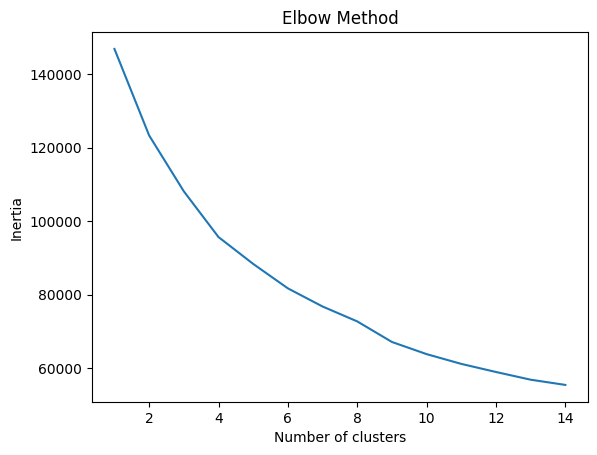

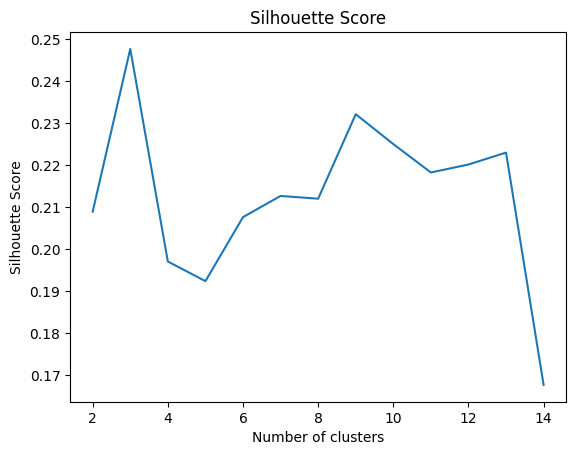

In [36]:

inertia = []
silhouette_avg = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(scaled_df, labels)]

# Silhouette Score

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [38]:
K = 3
kmeans = KMeans(n_clusters=K, random_state=0).fit(scaled_df)

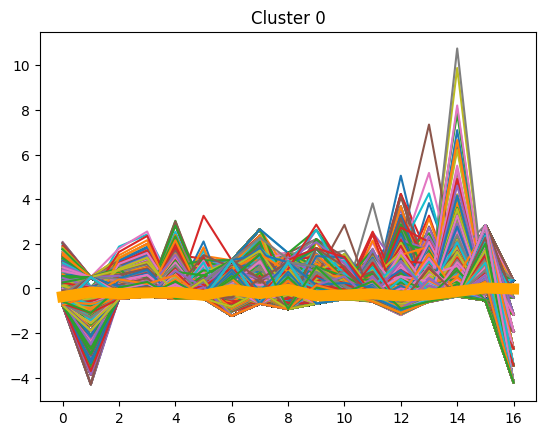

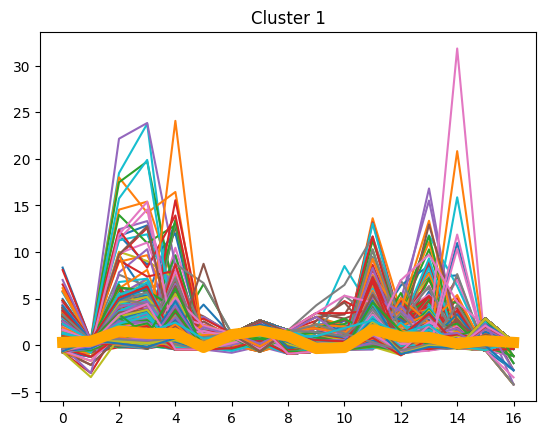

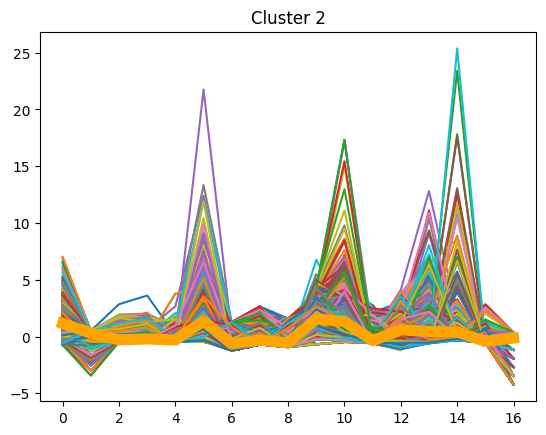

In [42]:
for c in range(K):
    # Convert the NumPy array to a Pandas DataFrame
    data_for_cluster_c = pd.DataFrame(scaled_df[kmeans.labels_ == c])

    # Plot the data, cluster center, and set a title
    data_for_cluster_c.T.plot(legend=False)
    plt.plot(kmeans.cluster_centers_[c], linewidth=8, color='orange')
    plt.title("Cluster " + str(c))

# Show the plots
plt.show()

In [43]:
sse_kmeans = kmeans.inertia_
silhouette_kmeans = silhouette_score(scaled_df, kmeans.labels_)

print("KMeans Clustering:")
print("Sum of Square Error SSE:", sse_kmeans)
print("Silhouette Score:", silhouette_kmeans)

KMeans Clustering:
Sum of Square Error SSE: 108086.33635631505
Silhouette Score: 0.24764339841031227


The SSE value is 108086.34, which indicates the sum of squared distances of data points to their respective cluster centers. Lower SSE values suggest more compact clusters.

The Silhouette Score is 0.248, which suggests that the data points are somewhat close to their own clusters and not too close to neighboring clusters. It's a moderate score and indicates that there is some structure in the clustering, but there might be room for improvement.

In [44]:
# Hierarchical Clustering
def hierarchical_clustering(data, n_clusters_range):
    silhouette_scores = []

    for n_clusters in n_clusters_range:
        model = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    return silhouette_scores

# DBSCAN Clustering
def dbscan_clustering(data, eps_range, min_samples_range):
    best_eps, best_min_samples, best_silhouette = 0, 0, -1

    for eps in eps_range:
        for min_samples in min_samples_range:
            model = DBSCAN(eps=eps, min_samples=min_samples)
            cluster_labels = model.fit_predict(data)
            unique_labels = np.unique(cluster_labels)
            
            if len(unique_labels) > 1:  # Ensure more than one cluster
                silhouette_avg = silhouette_score(data, cluster_labels)
                if silhouette_avg > best_silhouette:
                    best_eps, best_min_samples, best_silhouette = eps, min_samples, silhouette_avg

    return best_eps, best_min_samples, best_silhouette

In [45]:

from scipy.cluster.hierarchy import linkage
# Determine the optimal number of clusters using Hierarchical Clustering
n_clusters_range = range(2, 10)
silhouette_scores_hierarchical = hierarchical_clustering(scaled_df, n_clusters_range)

# Determine the optimal parameters using DBSCAN
eps_range = np.linspace(0.1, 2.0, 20)
min_samples_range = range(2, 11)
best_eps, best_min_samples, best_silhouette_dbscan = dbscan_clustering(scaled_df, eps_range, min_samples_range)

In [46]:
optimal_hierarchical_clusters = silhouette_scores_hierarchical.index(max(silhouette_scores_hierarchical)) + 2  # Add +2 to account for the range start

In [47]:
print("Best Silhouette Score for Hierarchical Clustering:", max(silhouette_scores_hierarchical))
print("Optimal Number of Clusters for Hierarchical Clustering:", optimal_hierarchical_clusters)
print("Best Silhouette Score for DBSCAN:", best_silhouette_dbscan)
print("Best Epsilon for DBSCAN:", best_eps)
print("Best Min Samples for DBSCAN:", best_min_samples)

Best Silhouette Score for Hierarchical Clustering: 0.18418454528547495
Optimal Number of Clusters for Hierarchical Clustering: 2
Best Silhouette Score for DBSCAN: 0.4766056227801351
Best Epsilon for DBSCAN: 2.0
Best Min Samples for DBSCAN: 6


Best Silhouette Score for Hierarchical Clustering: 0.18418454528547495

The Silhouette Score is a metric used to evaluate the quality of clustering. It measures how similar an object is to its cluster (cohesion) compared to other clusters (separation). The Silhouette Score ranges from -1 to 1, with higher values indicating better-defined clusters.
In this case, the best Silhouette Score achieved for Hierarchical Clustering is 0.184, which is relatively low. This score suggests that the clusters generated by Hierarchical Clustering are not well-separated and might have some overlap.
Optimal Number of Clusters for Hierarchical Clustering: 2

The optimal number of clusters for Hierarchical Clustering is determined by the configuration that resulted in the highest Silhouette Score. In this case, the best Silhouette Score was achieved with 2 clusters.
This means that the algorithm found two clusters in the data that resulted in the highest Silhouette Score. However, a Silhouette Score of 0.184 indicates that the clusters may not be well-defined or separated.



DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm. The best Silhouette Score achieved for DBSCAN is 0.477, which is relatively higher compared to the score for Hierarchical Clustering.
A Silhouette Score of 0.477 suggests that the clusters identified by DBSCAN are better defined and more separated compared to Hierarchical 
Clustering.

Best Epsilon for DBSCAN: 2.0

In DBSCAN, the parameter "epsilon" (ε) defines the radius within which the algorithm looks for neighboring data points. It is a crucial parameter that affects the cluster formation.

The best epsilon value found for DBSCAN is 2.0, which means that data points within a distance of 2.0 units from each other are considered neighbors.

Best Min Samples for DBSCAN: 6

The "min_samples" parameter in DBSCAN specifies the minimum number of data points required to form a dense region (core point). It affects the minimum cluster size.
The best "min_samples" value for DBSCAN is 6, indicating that at least six data points are required to form a dense region or cluster.

The results suggest that DBSCAN with an epsilon of 2.0 and a minimum of 6 samples per cluster outperforms Hierarchical Clustering in terms of the Silhouette Score. 

The Silhouette Score of 0.477 for DBSCAN indicates relatively well-defined clusters, while the Silhouette Score of 0.184 for Hierarchical Clustering suggests less distinct clusters. 

Therefore, for this dataset and evaluation metric, DBSCAN with the specified parameters is the preferred clustering algorithm.

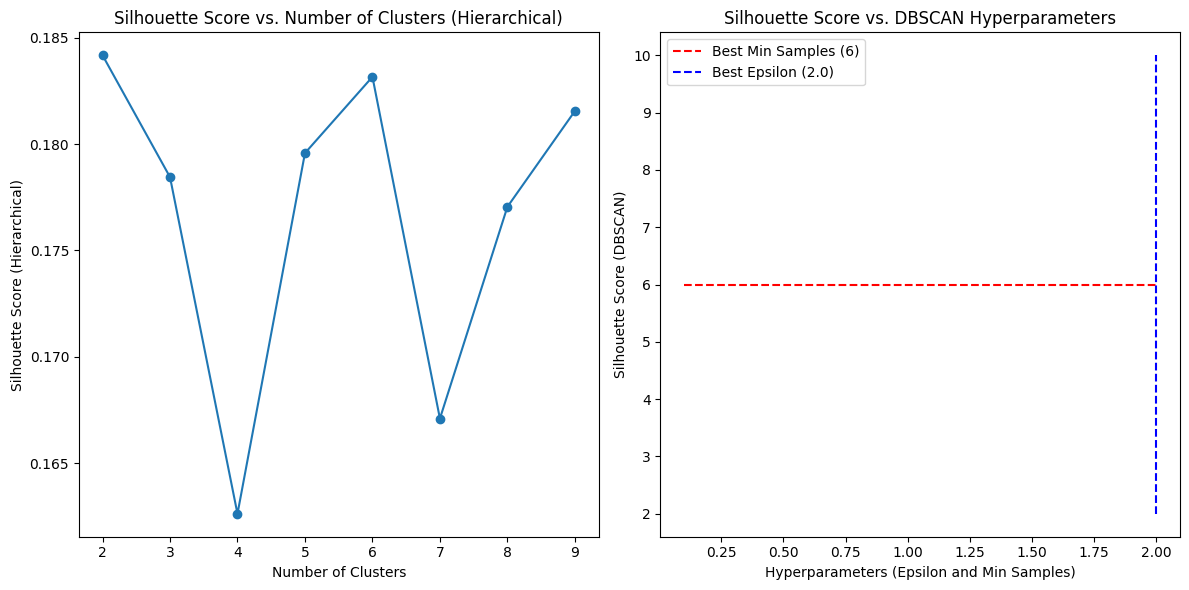

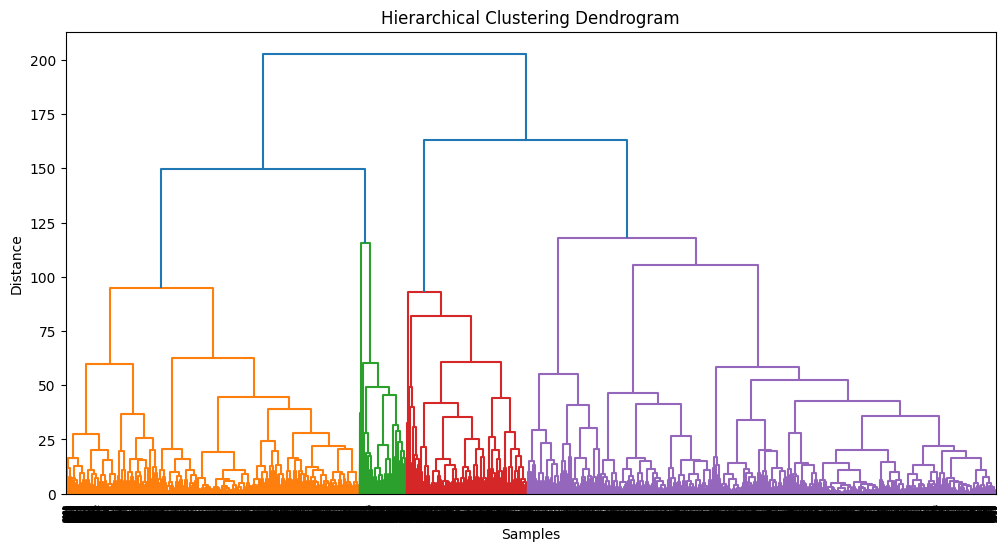

In [48]:

# Plot the results
plt.figure(figsize=(12, 6))

# Plot Hierarchical Clustering results (Silhouette Score vs. Number of Clusters)
plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, silhouette_scores_hierarchical, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score (Hierarchical)')
plt.title('Silhouette Score vs. Number of Clusters (Hierarchical)')

# Plot DBSCAN results (Silhouette Score vs. Hyperparameters)
plt.subplot(1, 2, 2)
plt.plot(eps_range, [best_min_samples] * len(eps_range), linestyle='--', label=f'Best Min Samples ({best_min_samples})', color='red')
plt.plot([best_eps] * len(min_samples_range), min_samples_range, linestyle='--', label=f'Best Epsilon ({best_eps})', color='blue')
plt.xlabel('Hyperparameters (Epsilon and Min Samples)')
plt.ylabel('Silhouette Score (DBSCAN)')
plt.title('Silhouette Score vs. DBSCAN Hyperparameters')
plt.legend()

plt.tight_layout()
plt.show()

# Apply Hierarchical Clustering with the optimal number of clusters
optimal_hierarchical_clusters = silhouette_scores_hierarchical.index(max(silhouette_scores_hierarchical)) + 2  # Add +2 to account for the range start
hierarchical_model = AgglomerativeClustering(n_clusters=optimal_hierarchical_clusters)
hierarchical_labels = hierarchical_model.fit_predict(scaled_df)

# Apply DBSCAN with the optimal hyperparameters
dbscan_model = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan_model.fit_predict(scaled_df)

# Visualize the hierarchical clustering result using a dendrogram
linkage_matrix = linkage(scaled_df, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


Interpreting Clusters [5 marks]:

Characterize the clusters formed: What kind of customers fall into each cluster? What features are most significant in distinguishing between clusters?

In [53]:
df['Cluster'] = dbscan_labels

In [59]:
df['Cluster'].describe()

count    8636.000000
mean       -0.072024
std         0.258543
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.000000
Name: Cluster, dtype: float64

In [60]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster' :dbscan_labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0,0.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0,0.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.0,-1.0


In [62]:
#cluster population
df_cluster['cluster'].value_counts()

cluster
 0.0    8014
-1.0     622
Name: count, dtype: int64

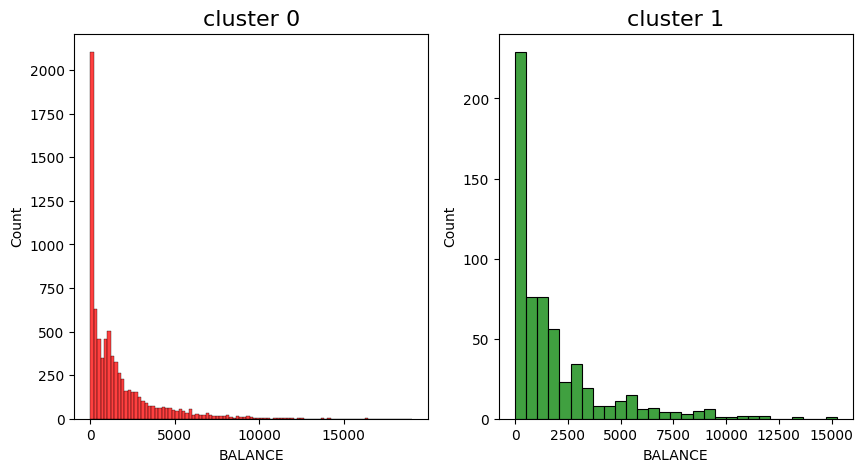

In [67]:
#plot comparison balance from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['BALANCE'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['BALANCE'], color='green' )
plt.title('cluster 1', size = 16)
plt.show()

Text(0.5, 1.0, 'cluster 1')

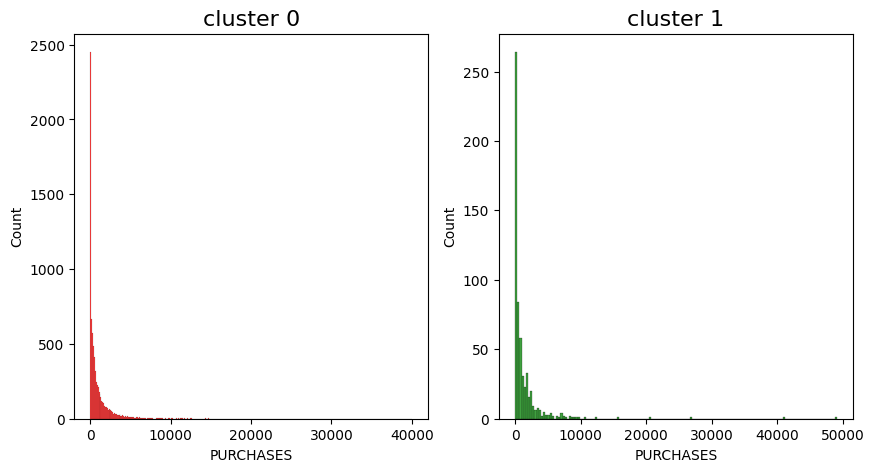

In [70]:
#plot comparison purchase from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PURCHASES'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PURCHASES'], color='green')
plt.title('cluster 1', size = 16)

Text(0.5, 1.0, 'Purchases Persentage')

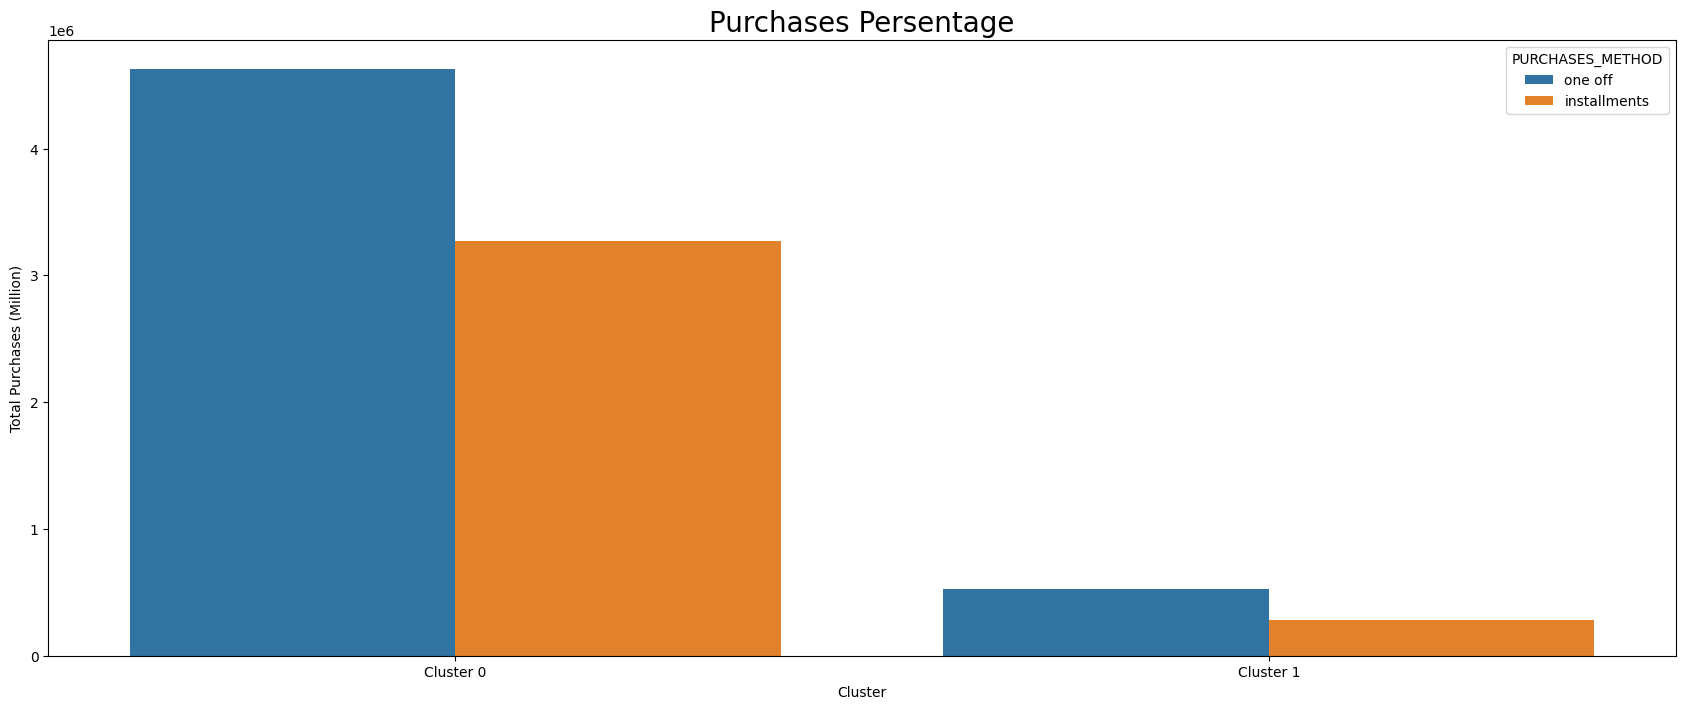

In [74]:
#Check Detail Purchases
plt.figure(figsize=(21,8))
ax = pd.DataFrame({'Cluster' : ['Cluster 0', 'Cluster 0', 'Cluster 1', 'Cluster 1'],
                    'PURCHASES' : [cluster_0['ONEOFF_PURCHASES'].sum(), 
                                   cluster_0['INSTALLMENTS_PURCHASES'].sum(),
                                   cluster_1['ONEOFF_PURCHASES'].sum(), 
                                   cluster_1['INSTALLMENTS_PURCHASES'].sum()], 
                    'PURCHASES_METHOD' : ['one off', 'installments', 'one off', 'installments']})
sns.barplot(x='Cluster', y='PURCHASES', data=ax, hue = 'PURCHASES_METHOD' )
plt.ylabel('Total Purchases (Million)')
plt.xlabel('Cluster')
plt.title('Purchases Persentage', size = 20)

Text(0.5, 1.0, 'cluster 1')

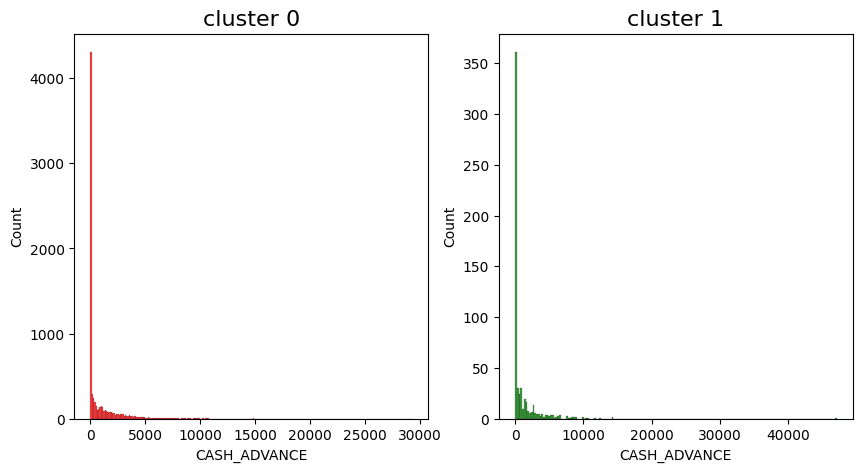

In [75]:
#plot comparison cash advance from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['CASH_ADVANCE'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['CASH_ADVANCE'], color='green')
plt.title('cluster 1', size = 16)

Text(0.5, 1.0, 'cluster 1')

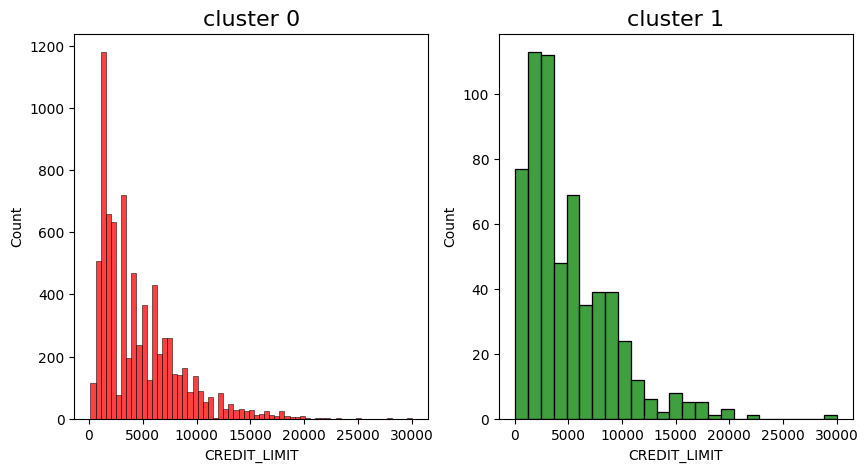

In [76]:
#plot comparison credit limit from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['CREDIT_LIMIT'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['CREDIT_LIMIT'], color='green')
plt.title('cluster 1', size = 16)

Text(0.5, 1.0, 'cluster 1')

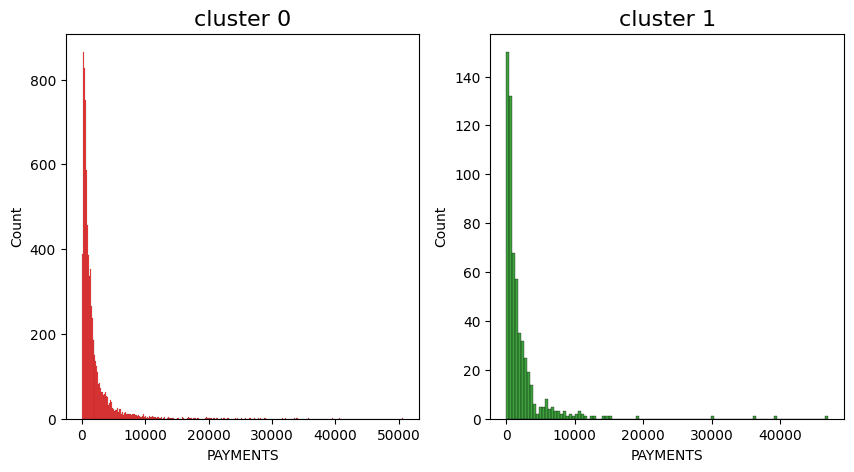

In [77]:
##plot comparison payments from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PAYMENTS'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PAYMENTS'], color='green')
plt.title('cluster 1', size = 16)

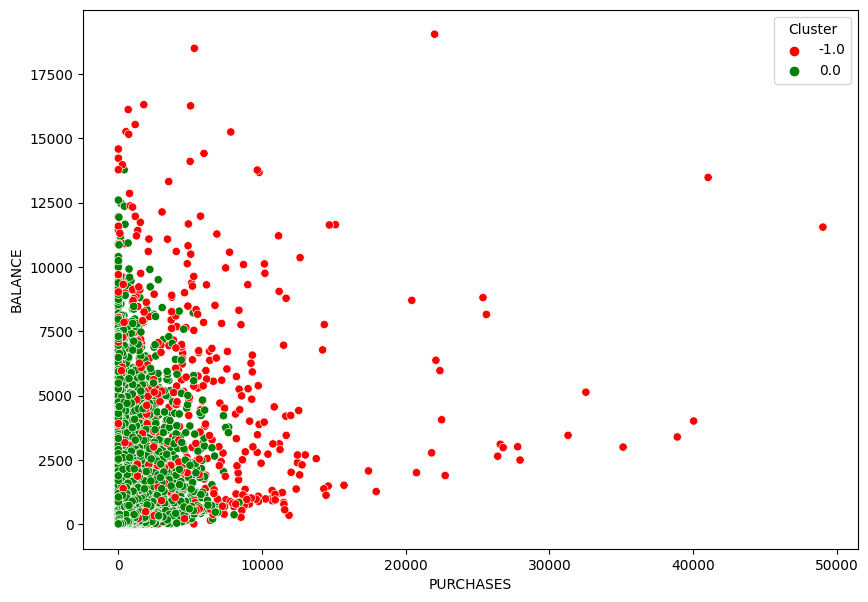

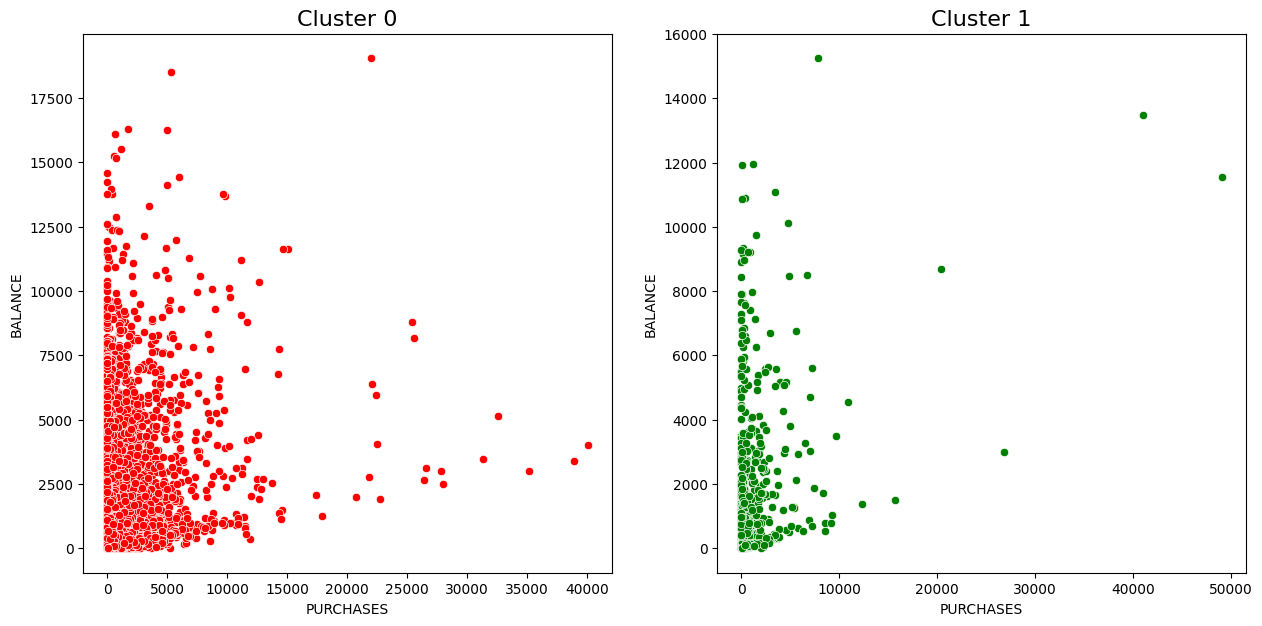

In [79]:
# Plot comparison of purchases from each cluster
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_cluster, x='PURCHASES', y='BALANCE', hue='Cluster', palette=['red', 'green'])
plt.show()

# Create subplots
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(data=cluster_0, x='PURCHASES', y='BALANCE', color='red')
plt.title('Cluster 0', size=16)

plt.subplot(1, 2, 2)
sns.scatterplot(data=cluster_1, x='PURCHASES', y='BALANCE', color='green')
plt.title('Cluster 1', size=16)

plt.show()

Text(0.5, 1.0, 'cluster 1')

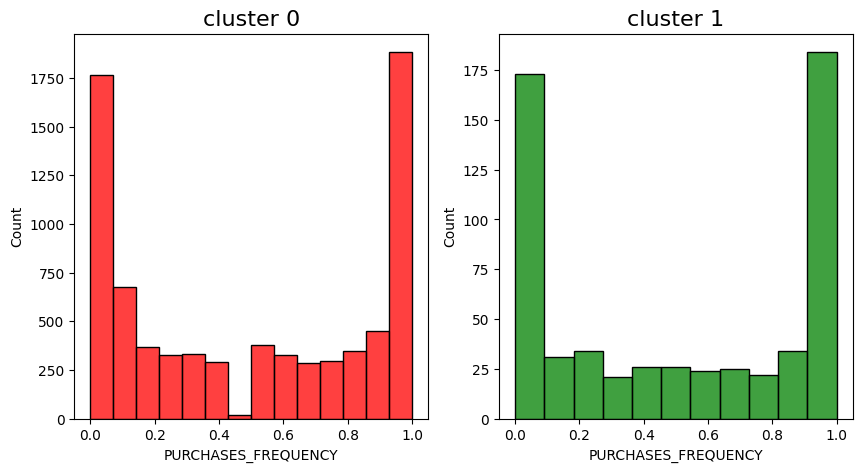

In [80]:
#plot comparison purchase frequency from each cluster
plt.figure(figsize=(21,5))
plt.subplot(1,4,1)
sns.histplot(cluster_0['PURCHASES_FREQUENCY'], color = 'red')
plt.title('cluster 0', size = 16)
plt.subplot(1,4,2)
sns.histplot(cluster_1['PURCHASES_FREQUENCY'], color='green')
plt.title('cluster 1', size = 16)

## **Cluster 1**

### **Money Hoarders**

**Characteristics:**

- Balance up to $5,000
- Rarely spend money
- Purchases worth not more than 10k
**Analysis:**

These users tend to maintain a high balance but seldom spend their money, whether using a credit card or not. It can be assumed that these users primarily allocate their funds to investment activities or use them as savings.

**Strategy:**

1. This could provide the marketing team with valuable insights, such as surveying customer characteristics like age (as more mature individuals tend to spend less money).
2. Collaborate with platforms or securities investment service providers to offer the option of topping up using a credit card, along with bonus points or cashback incentives for users who choose this method.

## **Cluster 0**

### **Potential Customers**

**Characteristics:**
- Maintain a balance of up to $10,000
- Frequently spend money
- Purchases worth majorly around 20k

**Analysis:**

Users in this cluster frequently opt for full payments without utilizing installment plans. It can be inferred that these users are likely making purchases to avoid credit card interest.

**Strategy:**

1. Offer the option to switch from full payment (one-off purchases) to installment plans without incurring additional fees.
2. This insight may prompt the marketing team to review customer profiles to determine if this segment of customers avoids using credit facilities due to high interest rates or other specific reasons.

Actionable Insights [5 marks]:

Provide business recommendations based on the clusters formed. How would you target different customer segments?


**Cluster 1: Money Hoarders**

**Business Recommendations:**
1. **Savings and Investment Products:** Given that these users maintain high balances and rarely spend, consider offering tailored savings and investment products. Highlight the benefits of growing their wealth through investment opportunities.
2. **Credit Card Usage Promotion:** Encourage these customers to use their credit cards for investment activities or emergencies. Offer credit card perks like cashback on investments or a higher credit limit.
3. **Marketing Strategies:** Focus marketing efforts on mature individuals who tend to save more. Target this group with financial planning and investment seminars.
   
**Cluster 0: Potential Customers**

**Business Recommendations:**
1. **Installment Options:** Promote installment payment plans without additional fees to entice these customers. Highlight the flexibility and convenience of spreading payments over time.
2. **Credit Education:** Educate these customers about the benefits of credit facilities and the responsible use of credit cards. Address any concerns they may have about interest rates.
3. **Customer Segmentation:** Investigate customer profiles to determine why this segment avoids using credit facilities. Tailor marketing messages and credit products to address their specific needs or concerns.

**Targeting Different Customer Segments:**
1. **Segment-Specific Marketing:** Develop marketing campaigns that target each cluster with tailored messaging. Highlight benefits and features of credit products that align with each segment's financial behavior and preferences.
2. **Personalized Offers:** Offer personalized credit card offers, rewards, and perks to match the needs and behaviors of each cluster. For example, offer investment-focused rewards for Money Hoarders and flexible installment plans for Potential Customers.
3. **Credit Limit Adjustment:** Consider adjusting credit limits based on the user's cluster. Offer higher credit limits to Money Hoarders who have ample savings and lower limits for Potential Customers who prefer responsible spending.

By implementing these recommendations, businesses can effectively target different customer segments, leading to increased customer satisfaction and potentially higher revenues.